In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [3]:
image_path = "../output_videos/cropped_img.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

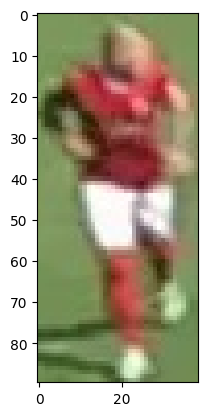

In [4]:
plt.imshow(image)
plt.show()

### Taking the top half of the image for the jersey/shirt

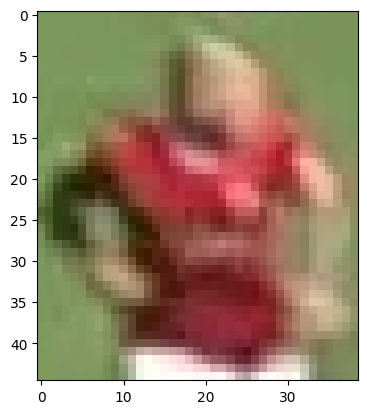

In [5]:
top_half_image = image[0 : int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

### Clustering the colors in the image into two, to segment out the background

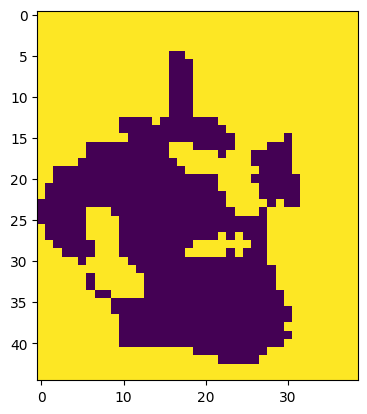

In [12]:
# Reshape the image into a 2D array
image_2d = top_half_image.reshape(-1, 3)

# Perform K-Means Clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# Get the cluster labels
labels = kmeans.labels_

# Reshape the labels into the original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Displaying the clustered image
plt.imshow(clustered_image)
plt.show()

In [13]:
# Finding the class label for the background using the corners
corner_clusters = [clustered_image[0,0], clustered_image[0,-1], clustered_image[-1,0], clustered_image[-1,-1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

1


In [14]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

0


In [15]:
kmeans.cluster_centers_[player_cluster]

array([120.91979522,  58.16723549,  47.65870307])